## Context

ABC Supermarket is planning for the year-end sale - they want to launch a new offer i.e. gold membership for only \\$499 that is of \\$999 on normal days (that gives 20% discount on all purchases) only for existing customers, for that they need to do a campaign through phone calls - the best way to reduce the cost of the campaign is to make a predictive model to classify customers who might purchase the offer, using the data they gathered during last year's campaign.

We will build a model for classifying whether customers will reply with a positive
response or not.

## Import Statements

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [85]:
df = pd.read_excel("marketing_data.xlsx")

## Column Definitions
- Response (target) - 1 if customer accepted the offer in the last campaign, 0
otherwise
- Complain - 1 if a customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase
- ID - unique customer-id
- Year_Birth - customer's year of birth

## Data Profiling

In [86]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [87]:
# dfdupes = df
df = df.drop(columns=['ID'])
df = df.drop_duplicates(keep='last')
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,16,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,18,...,47,48,78,2,5,2,11,4,0,0
2236,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,...,3,8,16,1,1,0,3,8,0,0
2237,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,2,...,15,5,14,2,6,1,5,8,0,0
2238,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,...,149,165,63,1,5,4,10,3,0,0


In [88]:
# df['Income'] = df['Income'].fillna(0)

### Data Preprocesssing

In [89]:
# Extracting Year from customer's date of enrolment

from datetime import datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')
df['Dt_Customer'] = df['Dt_Customer'].dt.year

df['Dt_Customer']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2235    2013
2236    2013
2237    2012
2238    2012
2239    2012
Name: Dt_Customer, Length: 2058, dtype: int32

In [90]:
df['Year_Birth'].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995, 1899,
       1943, 1941, 1940, 1900], dtype=int64)

In [91]:
# Removing Customer Records with Year_Birth earlier than 1940

def remove_centennial_cust(df):
    return df[df['Year_Birth']>=1940]

df = remove_centennial_cust(df)

df['Year_Birth'].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1996, 1995, 1943, 1941,
       1940], dtype=int64)

In [92]:
# Populating Missing Income with Median with Similar Education and MaritalStatus
median = df.groupby(['Education', 'Marital_Status'])['Income'].transform('median')
df['Income'] = df['Income'].fillna(median)

C:\Users\Predator\AppData\Local\Temp\ipykernel_25644\3008091632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = df['Income'].fillna(median)


Text(0, 0.5, 'Density')

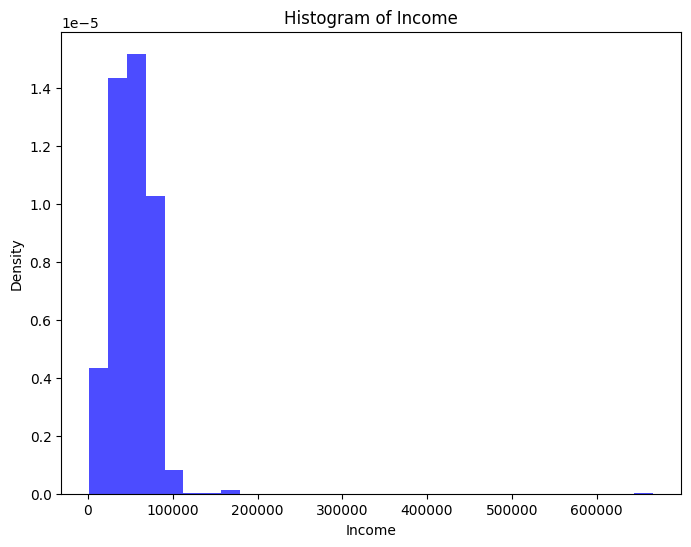

In [93]:
plt.figure(figsize=(8, 6))
plt.hist(df['Income'], bins=30, density=True, alpha=0.7, color='blue')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Density')

In [94]:
# Dropping Outliers in Income using STD method
income = df['Income'].values
mean = np.mean(income)
std = np.std(income)

threshold_lower = mean - 2 * std
threshold_upper = mean + 2 * std

# z_scores = np.abs((income-mean)/std)

df = df[(df['Income'] >= threshold_lower) & (df['Income'] <= threshold_upper)]


Text(0, 0.5, 'Density')

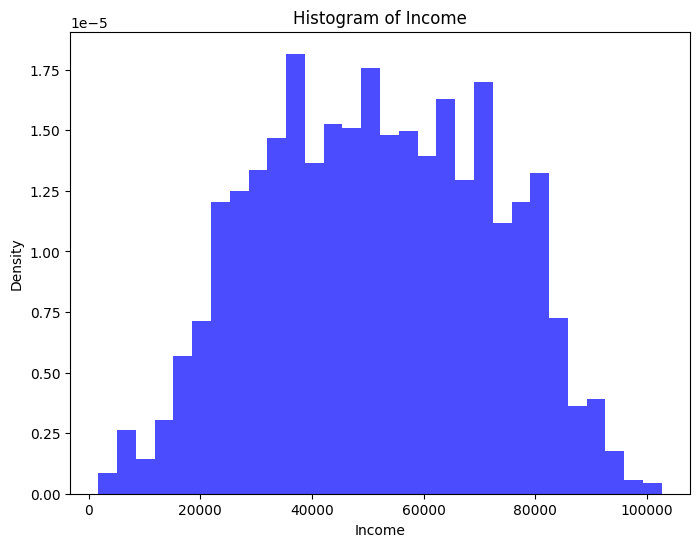

In [95]:
plt.figure(figsize=(8, 6))
plt.hist(df['Income'], bins=30, density=True, alpha=0.7, color='blue')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Density')

In [96]:
df['Income'].describe()

count      2045.000000
mean      51610.742054
std       20516.917981
min        1730.000000
25%       35682.000000
50%       51277.000000
75%       67893.000000
max      102692.000000
Name: Income, dtype: float64

In [97]:
# Ratio of Mnt column to the total of Mnt Column
# Assuming that the formulas are correct, no effect

# df['MntTotal'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
# sum = df['MntTotal'].sum()
# aveSum = sum/ len(df)
# df['Ratio'] = df['MntTotal']/aveSum

In [98]:
## WebTransactions
df['WebTransactions'] = df['NumWebPurchases']**2/df['NumWebVisitsMonth']

In [99]:
# Change Alone, Absurd, YOLO to Single
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 'Single')

In [100]:
df['Marital_Status'].value_counts()

Marital_Status
Married     792
Together    515
Single      453
Divorced    214
Widow        71
Name: count, dtype: int64

In [101]:
# Total # of Children and Identify if Single Parent
# No effect if no other column is removed
df['TotalChildren'] = df['Kidhome']+df['Teenhome']
df['SingleParent'] = False

# Single
SingleParentMask = (df['Marital_Status'] == 'Single') & (df['TotalChildren']>0)
df.loc[SingleParentMask, 'SingleParent'] = True

# Widow
SingleParentMask = (df['Marital_Status'] == 'Widow') & (df['TotalChildren']>0)
df.loc[SingleParentMask, 'SingleParent'] = True

# Incentivize DealsPurchases if SingleParent, No Effect
df.loc[df['SingleParent'], 'NumDealsPurchases'] **=2

In [102]:
## Educ Coding
educMap = {'Basic':1, '2n Cycle':2, 'Graduation':3,'Master':4,'PhD':5}
df['Education'] = df['Education'].replace(educMap)

C:\Users\Predator\AppData\Local\Temp\ipykernel_25644\997569839.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace(educMap)


In [103]:
## If Married with kids No effect
# df['Parents']=False
# df.loc[((df['Marital_Status'].isin(['Married', 'Together'])) & df['TotalChildren']>0),'Parents']=True

In [104]:
# Income to MNT total No Effect
# df['BoughtItems'] = df['Income']/(df['Mnt+df['MntFruits']+df['MntGoldProds']
#                                            +df['MntMeatFishProducts']Products']+df['MntSweetProducts']+df['MntWines'])

In [105]:
# No Effect
# bins = [0, 24, 177, 505, 1500]
# labels = [1,2,3,4]

# df['MntWinesNum'] = pd.cut(df['MntWines'],bins=bins, labels=labels, right=False)
# df['MntWinesNum'] = df['MntWinesNum'].astype(int)

In [106]:
df['MntWines'].describe()

count    2045.00000
mean      304.87335
std       336.44655
min         0.00000
25%        24.00000
50%       177.00000
75%       505.00000
max      1493.00000
Name: MntWines, dtype: float64

In [107]:
## RecencyRelevance
# df['RecencyRelevance'] = df['Recency']**2/(df['MntFishProducts']+df['MntFruits']+df['MntGoldProds']
#                                            +df['MntMeatProducts']+df['MntSweetProducts']+df['MntWines'])

In [108]:
df_complaints = df[df['Complain'] == 1] 
df_complaints

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,WebTransactions,TotalChildren,SingleParent
206,1988,2,Married,15716.0,1,0,2012,8,16,5,...,3,3,0,4,8,0,1,1.125000,1,False
297,1976,2,Together,26326.0,0,0,2013,12,1,0,...,1,0,0,3,3,0,1,0.000000,0,False
355,1983,4,Single,31788.0,1,0,2014,15,16,7,...,9,3,0,4,5,0,1,1.800000,1,True
555,1959,3,Together,57957.0,0,1,2013,24,290,59,...,7,4,6,8,3,0,1,5.333333,1,False
662,1977,3,Single,37774.0,2,0,2012,28,173,8,...,16,7,2,3,9,1,1,5.444444,2,True
728,1951,3,Divorced,22263.0,1,1,2014,31,17,0,...,2,1,0,3,6,0,1,0.166667,2,False
775,1950,3,Together,48070.0,0,1,2013,33,373,14,...,3,8,2,6,7,0,1,9.142857,1,False
943,1984,5,Single,39684.0,1,0,2012,41,19,0,...,4,2,1,2,7,1,1,0.571429,1,True
1000,1978,3,Single,38643.0,1,1,2013,45,22,2,...,4,2,0,3,7,0,1,0.571429,2,True
1087,1959,3,Single,80982.0,1,1,2013,48,505,137,...,9,11,5,11,5,0,1,24.200000,2,True


## Initial Exploratory Data Analysis

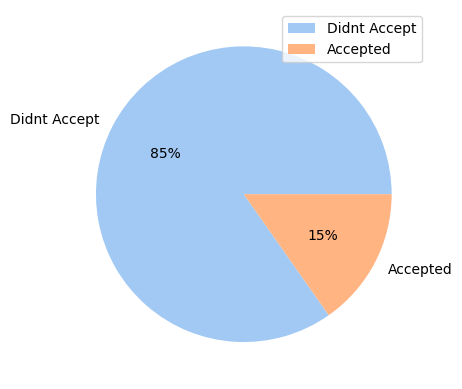

In [109]:
colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

#create pie chart
plt.pie(df['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

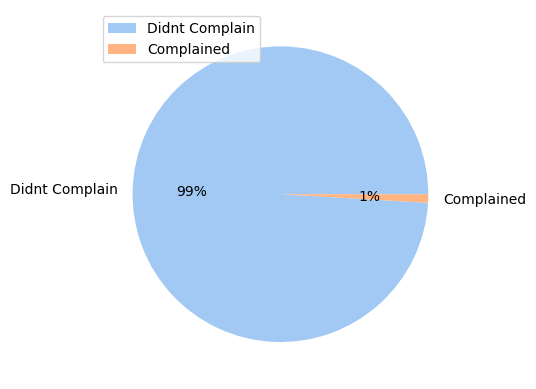

In [110]:
colors = sns.color_palette('pastel')[0:len(df['Complain'].value_counts())]

#create pie chart
plt.pie(df['Complain'].value_counts(), labels=['Didnt Complain', 'Complained'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

In [111]:
# sns.barplot(x = 'Income', y = 'count', data=df[['Income']].value_counts().reset_index(name='count'))
# sns.countplot(x='Income',data=df_complaints)
# plt.xticks(rotation=45)
# plt.show()
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,WebTransactions,TotalChildren,SingleParent
0,1970,3,Divorced,84835.0,0,0,2014,0,189,104,...,1,4,4,6,1,1,0,16.000000,0,False
1,1961,3,Single,57091.0,0,0,2014,0,464,5,...,1,7,3,7,5,1,0,9.800000,0,False
2,1958,3,Married,67267.0,0,1,2014,0,134,11,...,1,3,2,5,2,0,0,4.500000,1,False
3,1967,3,Together,32474.0,1,1,2014,0,10,0,...,1,1,0,2,7,0,0,0.142857,2,False
4,1989,3,Single,21474.0,1,0,2014,0,6,16,...,4,3,1,2,7,1,0,1.285714,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,5,Divorced,66476.0,0,1,2013,99,372,18,...,2,5,2,11,4,0,0,6.250000,1,False
2236,1977,2,Married,31056.0,1,0,2013,99,5,10,...,1,1,0,3,8,0,0,0.125000,1,False
2237,1976,3,Divorced,46310.0,1,0,2012,99,185,2,...,2,6,1,5,8,0,0,4.500000,1,False
2238,1978,3,Married,65819.0,0,0,2012,99,267,38,...,1,5,4,10,3,0,0,8.333333,0,False


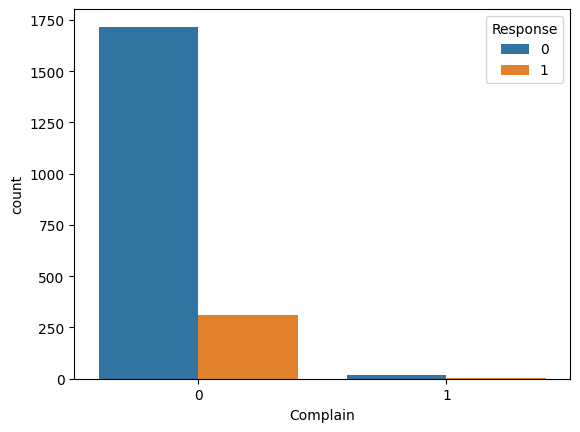

In [112]:
sns.barplot(x = 'Complain', y='count', hue = 'Response',data=df[['Complain', 'Response']].value_counts().reset_index())
    
plt.show()

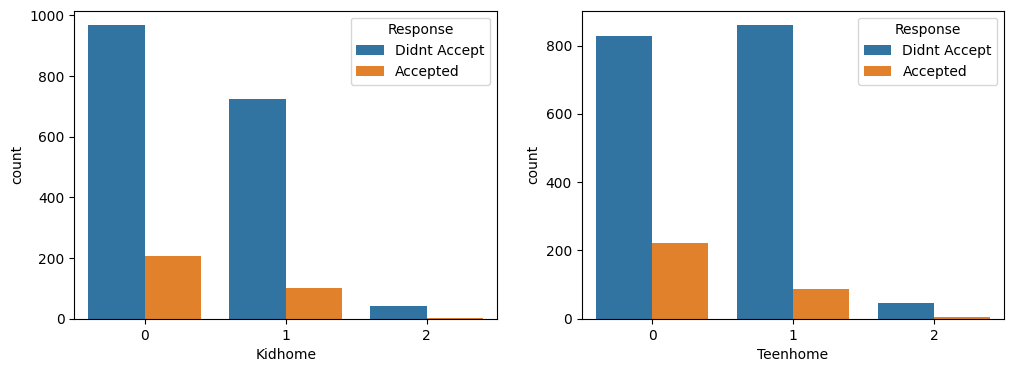

In [113]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

for i, ax, col in zip(range(2), axes.flat, ['Kidhome', 'Teenhome']):
    tmp = df[[col, 'Response']].value_counts().to_frame().reset_index()
    tmp['Response'] = tmp['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

    sns.barplot(x = col, y='count', 
                   hue = 'Response',data=tmp, ax=ax)
    
plt.show()

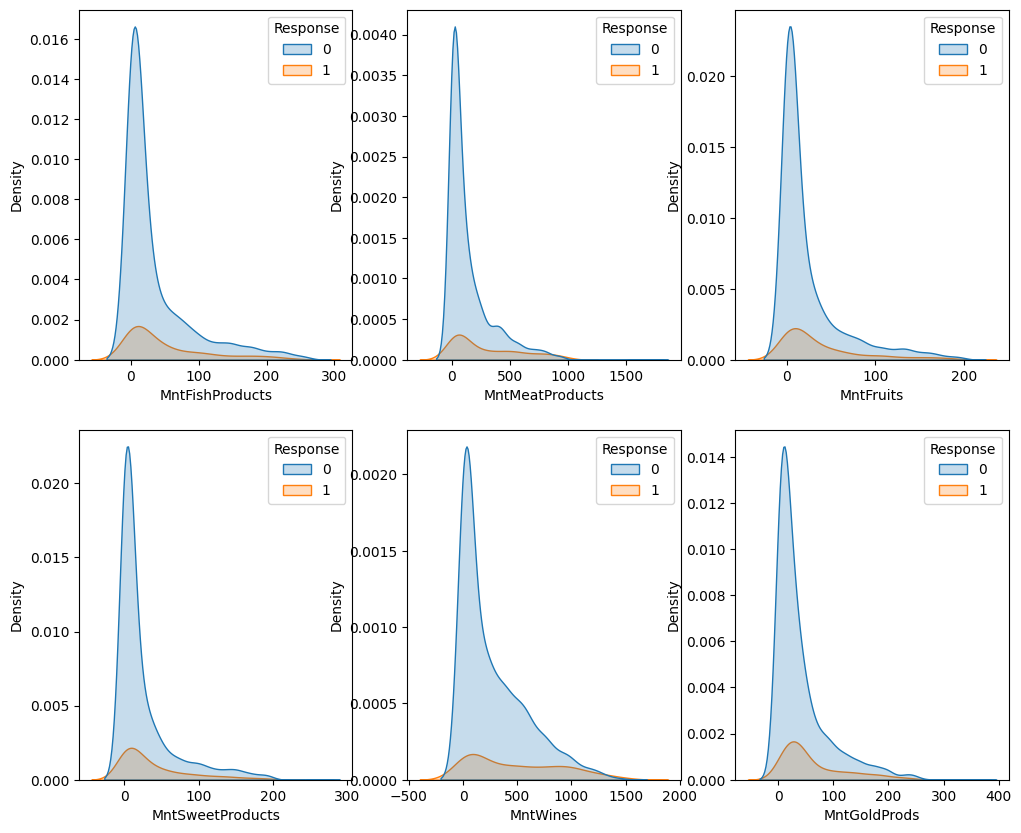

In [114]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 10))

for i, ax, col in zip(range(6), axes.flat, ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']):
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)
    
plt.show()

In [115]:
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first=True, prefix=column+suffix)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

## Baseline Modelling

In [116]:
df = one_hot_encode(df, 'Marital_Status')

In [117]:
df.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'WebTransactions', 'TotalChildren', 'SingleParent',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

In [119]:
X = df.drop('Response', axis=1).iloc[:,1:][['MntFishProducts', 'MntMeatProducts', 'MntFruits'
                                            , 'MntSweetProducts', 'MntWines', 'MntGoldProds'
                                            , 'Dt_Customer', 'NumWebVisitsMonth', 'NumWebPurchases'
                                            , 'Teenhome', 'Kidhome']]
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [120]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [121]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [122]:
clf = LogisticRegression().fit(X_train, y_train)
preds = clf.predict(scaler.transform(X_test))

In [123]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [124]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8436
Precision: 0.4583
Recall: 0.1170
F1: 0.1864
AUC: 0.5460


### Result Matrix and Graphs

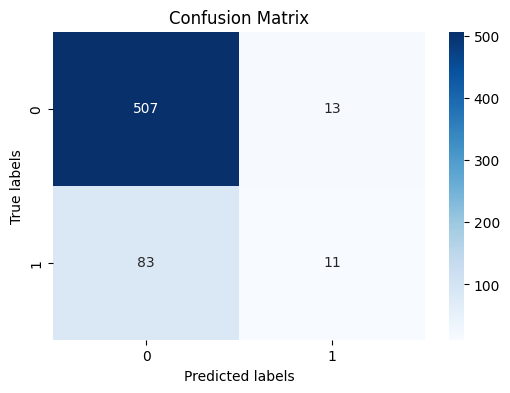

In [125]:
conf_mat = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

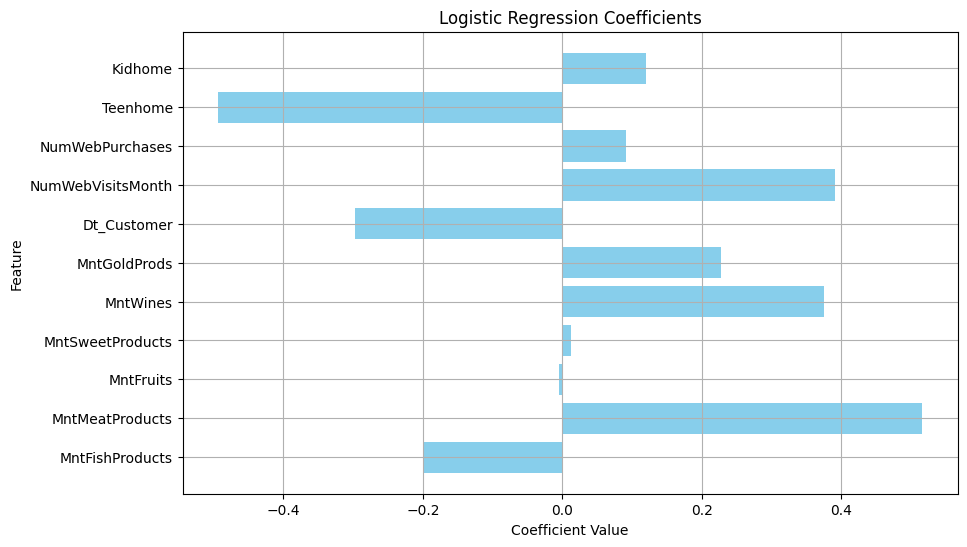

In [126]:
## Feature Importance
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), clf.coef_[0], color='skyblue')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()